In [1]:
import pandas as pd
import numpy as np
import math
import cmath
from scipy import special
from scipy import interpolate
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#calculating up_m(x)

In [3]:
k_max = 50 # number of harmonics
l_max = 5 # Fourier accuracy
m = 3      # main parameter
N2 = 500
N = 2*N2    # number of intervals
delta = 1/N
func_value = np.arange(-1,1+delta,delta)

def fur_up_m(x):
    y=1
    for l in range (1,l_max):
        t=x/((2*m)**l)
        sincm=sin(m*t)/(m*t)
        y *= t*sincm*sincm/sin(t)
    return (y)

def up_m(x):
    if (math.fabs(x)>=1):
        return (0)
    y = 0.5
    for k in range (1,k_max):
        a=math.pi*k
        y+=fur_up_m(a)*math.cos(a*x)
    return (y)

In [4]:
time1=time.perf_counter()
result_of_func = np.zeros((func_value.shape[0],2))
for i in range (func_value.shape[0]):
    result_of_func[i][0] = up_m(func_value[i])
    result_of_func[i][1] = func_value[i]
time2=time.perf_counter()
print (time2-time1)

def up_mm(x):
    if (math.fabs(x)>=1):
        return (0)
    i=int(round(N*(x+1)))
    if (math.fabs(i-N*(x+1))<delta/4):
        return (result_of_func[i][0])
    return (up_m(x))

1.751714841


Text(0.5, 1.0, '$up_m(x)$')

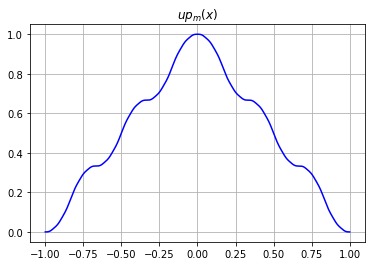

In [5]:
pylab.grid(True)
pylab.plot(result_of_func[:, 1], result_of_func[:, 0], 'b-')
pylab.title('$up_m(x)$')
#pylab.xlabel('x')
#pylab.ylabel('f(x)')

In [6]:
#making partiall summ AF

In [7]:
time1=time.perf_counter()

t = np.arange(-4*math.pi/3,4*math.pi/3+delta,delta)
up_summ = np.zeros((t.shape[0],5))

def up_tilda2(x):
    om=3*x/(2*math.pi)
    return (math.fabs(up_m(om+1)+up_m(om)+up_m(om-1)))

for i in range (t.shape[0]):
    up_summ[i][0] = up_tilda2(t[i])
    #if (up_summ[i][0]<0):
    #    print(3*t[i]/(2*math.pi)+1)
    x=3*t[i]/(2*math.pi)
    up_summ[i][1] = up_m(x+1)
    up_summ[i][2] = up_m(x)
    up_summ[i][3] = up_m(x-1)
    up_summ[i][4] = sqrt(up_summ[i][0])

time2=time.perf_counter()
print (time2-time1)
#koef = 2*math.pi/3

23.909632997000003


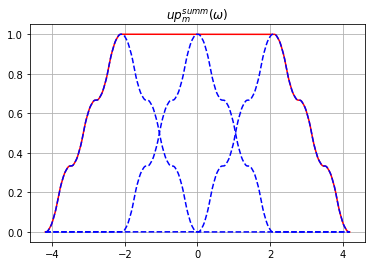

In [8]:
pylab.grid()
pylab.title('$up_m^{summ}(\omega)$')
pylab.plot(t, up_summ[:,0], 'r-')
pylab.plot(t, up_summ[:,1], 'b--')
pylab.plot(t, up_summ[:,2], 'b--')
pylab.plot(t, up_summ[:,3], 'b--')

In [9]:
#2 Fourier transform of the scaling function phi

Text(0.5, 0, '$\\omega$')

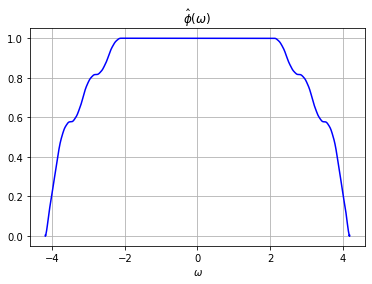

In [10]:
def phi_fur(x):
    return (sqrt(up_tilda2(x)))

pylab.grid()
pylab.title('$\hat{\phi}(\omega)$')
pylab.plot(t, up_summ[:,4], 'b-')
#pylab.plot(t, up_summ[:,0], 'g-')
pylab.xlabel('$\omega$')
#pylab.ylabel('$\hat{\phi}(\omega)$')

In [11]:
#3 checking theorem 2

In [12]:
t1 = np.arange(-4*math.pi/3,10*math.pi/3+delta,delta)
theo = np.zeros((t1.shape[0],3))

for i in range (t1.shape[0]):
    theo[i][0] = up_tilda2(t1[i])
    theo[i][1] = up_tilda2(t1[i]-2*math.pi)
    theo[i][2] = theo[i][0]+theo[i][1]

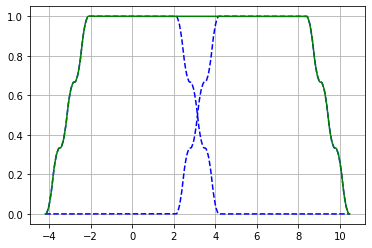

In [13]:
#pylab.title('$\hat{\phi}(\omega)$')
pylab.grid()
pylab.plot(t1, theo[:,0],'b--')
pylab.plot(t1, theo[:,1],'b--')
pylab.plot(t1, theo[:,2],'g-')

In [14]:
#4 H0 and checking the scaling equation

In [15]:
def H0(x):
    kk=int(round(-x/(2*math.pi)))
    #print(kk)
    su = 0
    for j in range(kk, kk+2):
        su += sqrt(up_tilda2((2*(x+2*math.pi*j))))
    return (su)

In [16]:
w = np.arange(-10*math.pi/3,10*math.pi/3+delta,delta)
res_h0 = np.zeros((w.shape[0],1))

for i in range (w.shape[0]):
    res_h0[i][0] = H0(w[i])

Text(0.5, 1.0, '$H_0(\\omega)$')

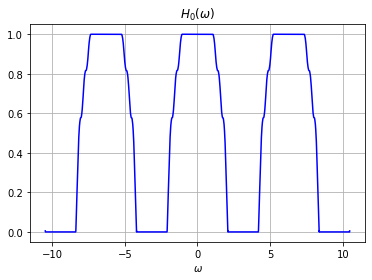

In [17]:
pylab.grid()
pylab.plot(w, res_h0[:,0],'b-')
pylab.xlabel('$\omega$')
pylab.title('$H_0(\omega)$')

In [18]:
w = np.arange(-10*math.pi/3,10*math.pi/3+delta,delta)
res_214 = np.zeros((w.shape[0],4))
for i in range (w.shape[0]):
    res_214[i][0] = H0(w[i]/2)
    res_214[i][1] = sqrt(up_tilda2(w[i]/2))
    res_214[i][2] = res_214[i][0]*res_214[i][1]
    res_214[i][3] = sqrt(up_tilda2(w[i]))

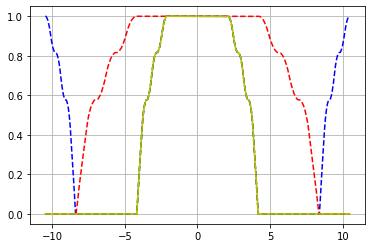

In [19]:
pylab.grid()
pylab.plot(w, res_214[:,0],'b--')
pylab.plot(w, res_214[:,1], 'r--')
pylab.plot(w, res_214[:,2], 'g--')
pylab.plot(w, res_214[:,3], 'y-')

In [20]:
#5 checking theorem 3

In [21]:
w = np.arange(-10*math.pi/3,10*math.pi/3+delta,delta)

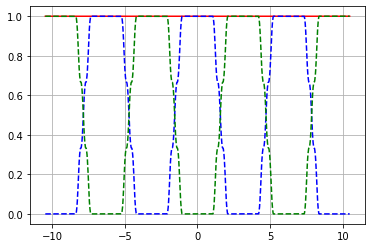

In [22]:
res_t3 = np.zeros((w.shape[0],3))
for i in range (w.shape[0]):
    res_t3[i][1] = (H0(w[i]))**2
    res_t3[i][2] = (H0(w[i] + math.pi))**2
    res_t3[i][0] = res_t3[i][1]+res_t3[i][2]

pylab.grid()
pylab.plot(w, res_t3[:,0], 'r-')
pylab.plot(w, res_t3[:,1], 'b--')
pylab.plot(w, res_t3[:,2], 'g--')

In [23]:
#6 to find psi_F

In [24]:
def psi_fur(w):
    return(abs(np.exp(-1j*w/2)*(phi_fur(w-2*math.pi)+phi_fur(w+2*math.pi))*phi_fur(w/2)))

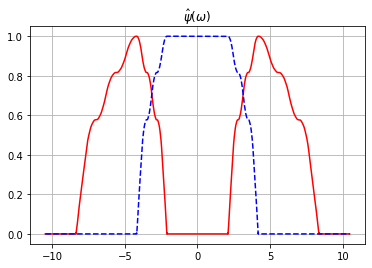

In [25]:
res_psi = np.zeros((w.shape[0],2))
for i in range (w.shape[0]):
    res_psi[i][0] = psi_fur(w[i])
    res_psi[i][1] = phi_fur(w[i])

pylab.grid()
pylab.title('$\hat{\psi}(\omega)$')
pylab.plot(w, res_psi[:,0], 'r-')
pylab.plot(w, res_psi[:,1], 'b--')


In [26]:
#7 check 2.21

In [27]:
res_221 = np.zeros((w.shape[0],4))
for i in range (w.shape[0]):
    res_221[i][0] = psi_fur(w[i])**2
    res_221[i][1] = phi_fur(w[i])**2
    res_221[i][2] = res_221[i][0]+res_221[i][1]
    res_221[i][3] = phi_fur(w[i]/2)**2

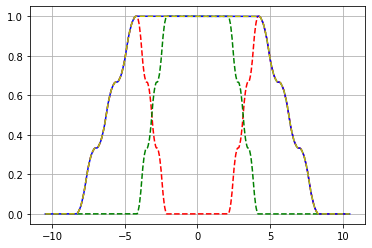

In [28]:
pylab.grid()    
pylab.plot(w, res_221[:,0], 'r--')
pylab.plot(w, res_221[:,1], 'g--')
pylab.plot(w, res_221[:,2], 'b-')
pylab.plot(w, res_221[:,2], 'y--')

In [29]:
#8 to find phi(x) and psi(x)

In [30]:
def ader(f, x, a, b): # antiderivative by rectangle formula
    delta1 = (b-a)/200
    wi = np.arange(a, b+delta1, delta1)
    summa = 0
    for k in range(wi.shape[0]):
        summa+=f(wi[k],x)*delta1
    return(summa)

In [31]:
delta2=delta*100
x = np.arange(-12,12+delta2,delta2)

def phi_of(w, x):
    return(phi_fur(w)*np.cos(w*x))
def phi(x):
    return(ader(phi_of, x, 0, 4*pi/3)/pi)

res_phi = np.zeros((x.shape[0],1))
for i in range (x.shape[0]):
    res_phi[i][0] = phi(x[i])

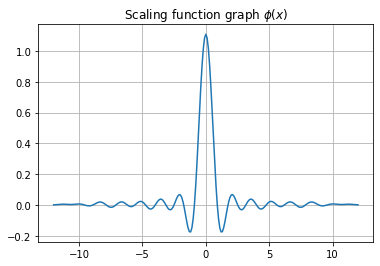

In [32]:
pylab.title('Scaling function graph $\phi(x)$')
pylab.plot(x, res_phi[:,0])
pylab.grid()

In [33]:
print (phi(10))
print (phi(-10))

0.006594560384114388
0.006594560384114388


In [34]:
def psi_of(w, x):
    return(phi_fur(w/2)*phi_fur(w-2*pi)*np.cos(w*(x+0.5)))
def psi(x):
    return(ader(psi_of, x, 2*pi/3, 8*pi/3)/pi)

res_psi = np.zeros((x.shape[0],1))
for i in range (x.shape[0]):
    res_psi[i][0] = psi(x[i])

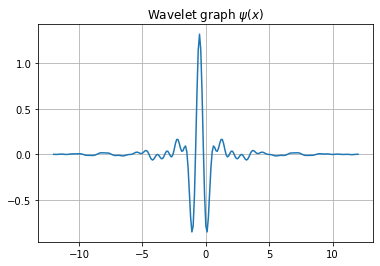

In [35]:
pylab.title('Wavelet graph $\psi(x)$')
pylab.plot(x, res_psi[:,0])
pylab.grid()

In [36]:
print(psi(10))
print(psi(-10))

-0.0019894106768340546
0.006200451678360873


In [37]:
#10 calculate filter coefficients

In [38]:
def hn_of(w, n):
    return(H0(w)*np.exp(1j*n*w))
def hn(n):
    return(1/(sqrt(2)*pi)*ader(hn_of, n, -pi, pi))
def gn(n):
    return((-1)**abs(n+1)*(hn(-n-1).conjugate()))
def hn1(n):
    return(hn(-n).conjugate())
def gn1(n):
    return((-1)**abs(n-1)*hn(n-1))

In [39]:
n = np.arange(-20, 20, 1)

In [40]:
s = 0
for i in range(n.shape[0]):
  s+=hn(i)
print (s.real/sqrt(2))

0.7761190380367835


In [41]:
res_hn = np.zeros((n.shape[0],4))
for i in range (n.shape[0]):
    res_hn[i][0] = hn(n[i]).real #h_n
    res_hn[i][1] = gn(n[i]).real # g_n
    res_hn[i][2] = hn1(n[i]).real # ~h_n
    res_hn[i][3] = gn1(n[i]).real # ~g_n

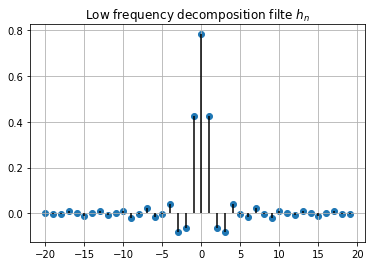

In [42]:
pylab.title('Low frequency decomposition filte $h_n$')
pylab.scatter(n, res_hn[:,0])
pylab.grid()
pylab.vlines(n, 0, res_hn[:,0])

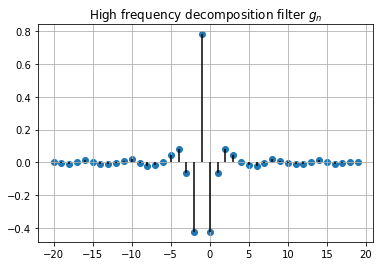

In [43]:
pylab.scatter(n, res_hn[:,1])
pylab.title('High frequency decomposition filter $g_n$')
pylab.grid()
pylab.vlines(n, 0, res_hn[:,1])

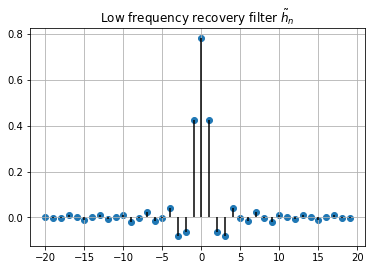

In [44]:
pylab.scatter(n, res_hn[:,2])
pylab.title('Low frequency recovery filter $\\tilde{h}_n$')
pylab.grid()
pylab.vlines(n, 0, res_hn[:,2])

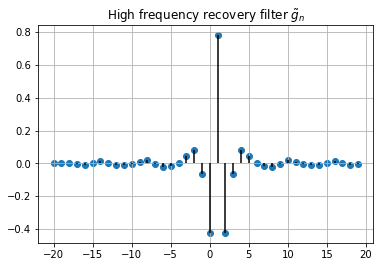

In [45]:
pylab.scatter(n, res_hn[:,3])
pylab.title('High frequency recovery filter $\\tilde{g}_n$')
pylab.grid()
pylab.vlines(n, 0, res_hn[:,3])

In [46]:
#11 Uncertainty coefficients

In [47]:
def integ(f, a, b): # integral from a to b
    delta1 = (b-a)/40
    wi = np.arange(a, b+delta1, delta1)
    summa = 0
    for k in range(wi.shape[0]):
        summa+=f(wi[k])*delta1
    return(summa)

In [48]:
def phi2(t):
    return (phi(t).real**2)
norm_phi = integ(phi2, -10, 10)   

def tphi(t):
    return (t*(phi(t).real**2))
tp=integ(tphi, -10, 10)/norm_phi

def d_phi(t):
    return (((t-tp)*phi(t).real)**2)
dphi=sqrt(integ(d_phi, -10, 10)/norm_phi)

In [49]:
def phi2_fur(t):
    return (phi_fur(t).real**2)
norm_phi_fur = integ(phi2_fur, -10, 10)   

def tphi_fur(t):
    return (t*(phi_fur(t).real**2))
tp_fur = integ(tphi_fur, -10, 10)/norm_phi_fur

def d_phi_fur(t):
    return (((t-tp_fur)*phi_fur(t).real)**2)
dphi_fur=sqrt(integ(d_phi_fur, -10, 10)/norm_phi_fur)

In [50]:
def psi2(t):
    return (psi(t).real**2)
norm_psi = integ(psi2, -10, 10) 

def tpsi(t):
    return (t*(psi(t).real**2))
tps=integ(tpsi, -10, 10)/norm_psi

def d_psi(t):
    return (((t-tps)*psi(t).real)**2)
dpsi=sqrt(integ(d_psi, -10, 10)/norm_psi)

In [51]:
def psi2_fur(t):
    return (psi_fur(t).real**2)
norm_psi_fur = integ(psi2_fur, -10, 10)

def tpsi_fur(t):
    return (t*(psi_fur(t).real**2))
tps_fur=integ(tpsi_fur, -10, 10)/norm_psi_fur

def d_psi_fur(t):
    return (((t-tps_fur)*psi_fur(t).real)**2)
dpsi_fur=sqrt(integ(d_psi_fur, -10, 10)/norm_psi_fur)

In [52]:
print (dphi_fur*dphi)
print (dpsi_fur*dpsi)

0.938472493455444
2.2025090351703502
